In [10]:

#https://www.kaggle.com/datasets/mathchi/diabetes-data-set 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv(r'C:\Users\bayan.aldorgham\Downloads\archive (1)\diabetes.csv')


In [12]:
#data.head()
#data.tail()
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
511,0,139,62,17,210,22.1,0.207,21,0
258,1,193,50,16,375,25.9,0.655,24,0
689,1,144,82,46,180,46.1,0.335,46,1


In [16]:
data.shape

(768, 9)

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.duplicated().sum()



0

In [24]:
#Finding Missing Values in Data
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


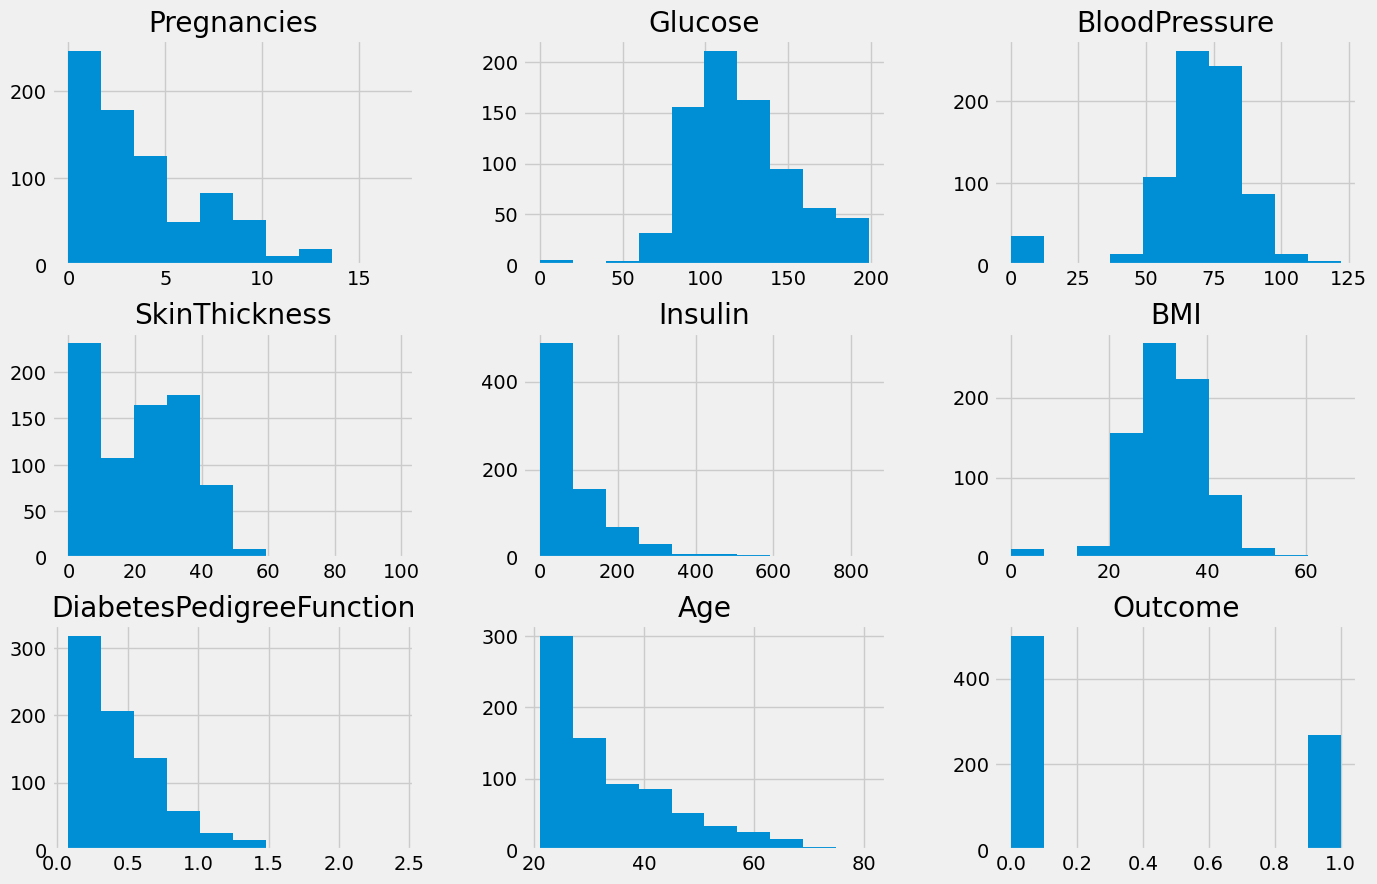

In [26]:
# Understanding the Shape and Distribution of Data to Complete the Missing Data
data.hist(bins=10,figsize=(15,10))
plt.show()

In [28]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

In [30]:
data.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

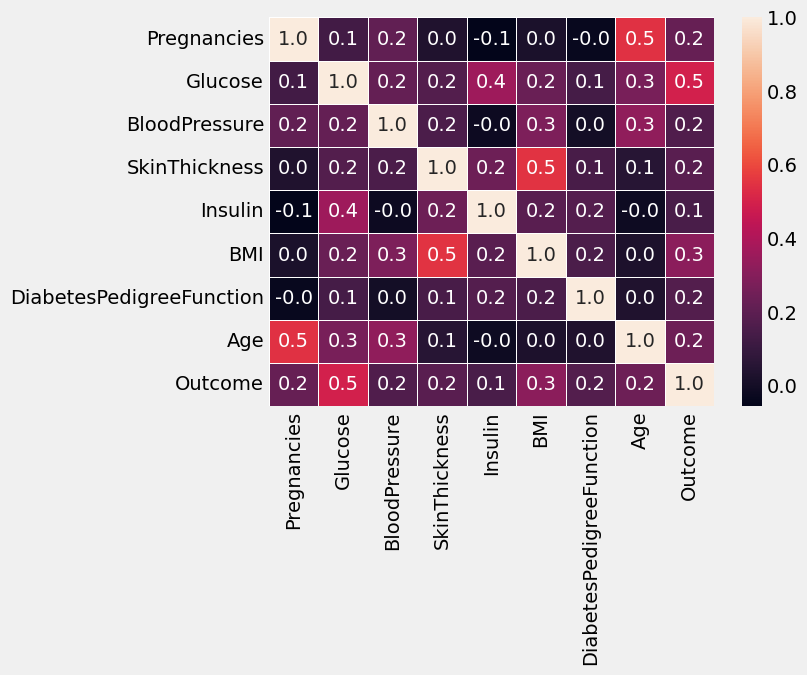

In [32]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f')

In [34]:
data=data.drop('Insulin',axis=1)

<Axes: xlabel='Outcome', ylabel='count'>

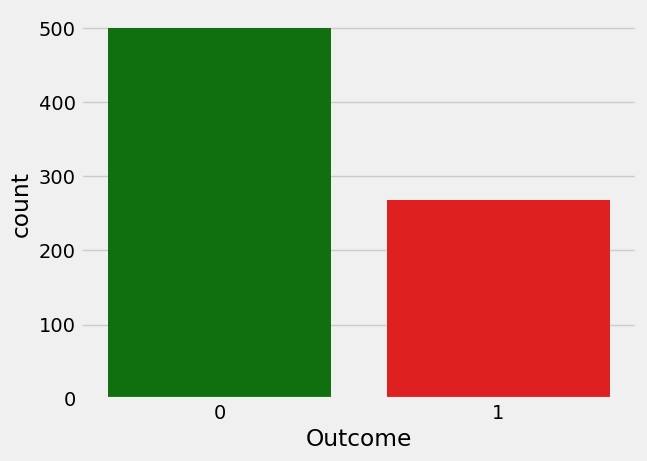

In [36]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])


In [38]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape  ,mini.shape
268/(500+268)

0.3489583333333333

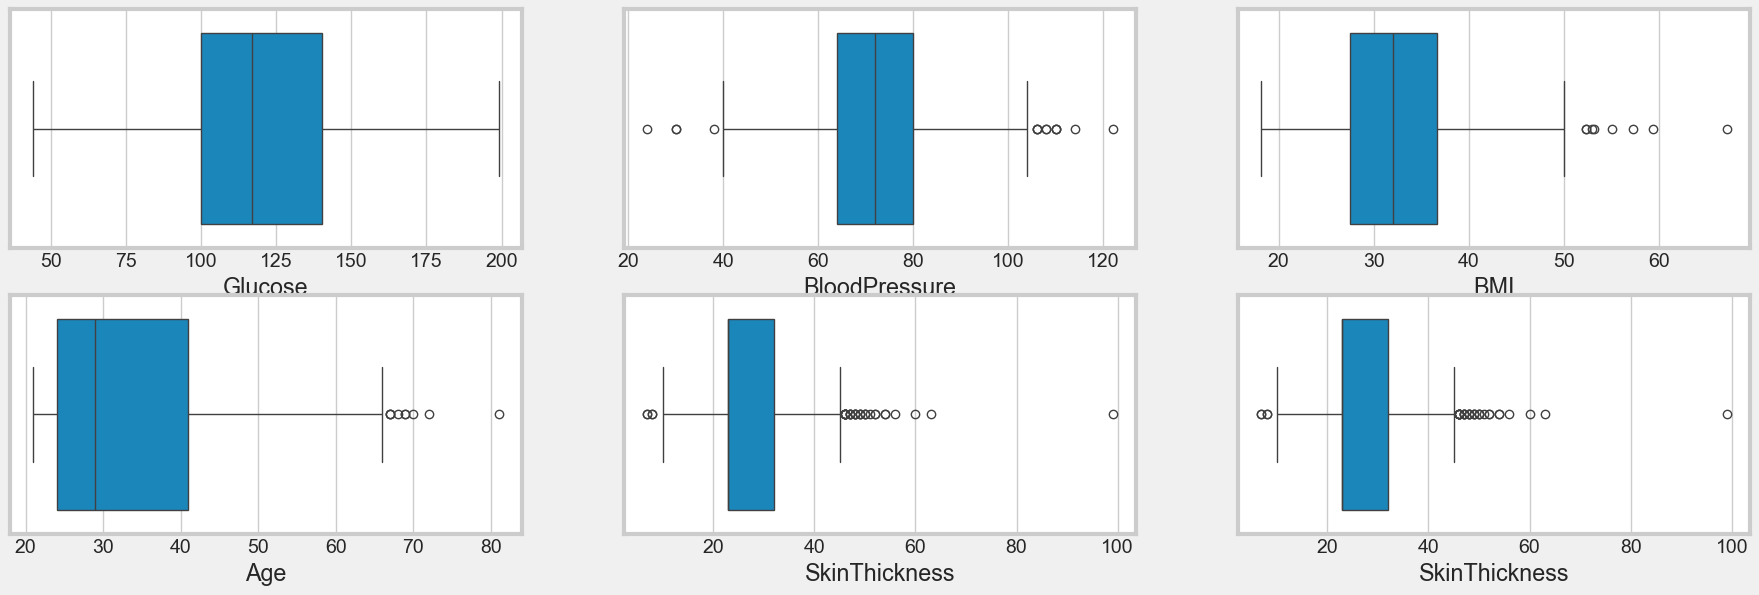

In [40]:
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data) 
plt.subplot(3,3,3)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,6)
plt.show()

In [42]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']   

In [44]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [46]:
print('old data set shape{}'.format(Counter(y)))
print('old data set shape{}'.format(Counter(y_res)))

old data set shapeCounter({0: 500, 1: 268})
old data set shapeCounter({1: 500, 0: 500})


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41,shuffle=True)


In [50]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
model4=GradientBoostingClassifier(n_estimators=1000)
model5=KNeighborsClassifier()
model6=GaussianNB()
model7=DecisionTreeClassifier()

In [52]:
col=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

LogisticRegression()
accuracy is :  0.735 recall is : 0.7849462365591398 precision is : 0.6886792452830188 f1 is : 0.7336683417085427


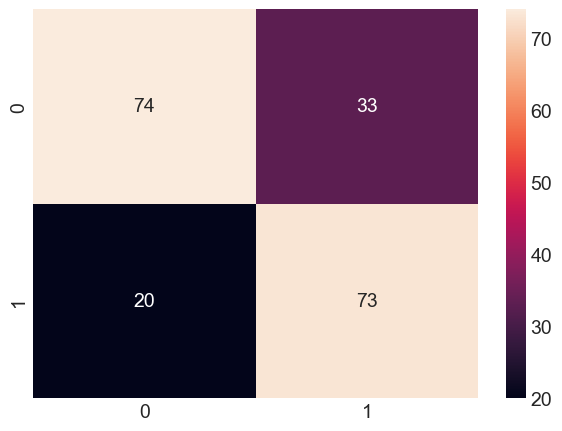

In [54]:
def cal(model):    
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    precision=precision_score(pre,y_test)
    f1=f1_score(pre,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is : ',accuracy,'recall is :',recall,'precision is :',precision,'f1 is :' ,f1)
cal(model1)

SVC()
accuracy is :  0.715 recall is : 0.7425742574257426 precision is : 0.7075471698113207 f1 is : 0.7246376811594203


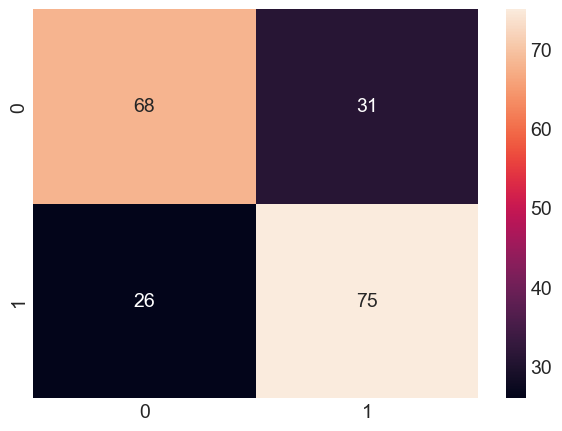

In [56]:
cal(model2)

RandomForestClassifier(n_estimators=500)
accuracy is :  0.875 recall is : 0.8584070796460177 precision is : 0.9150943396226415 f1 is : 0.8858447488584474


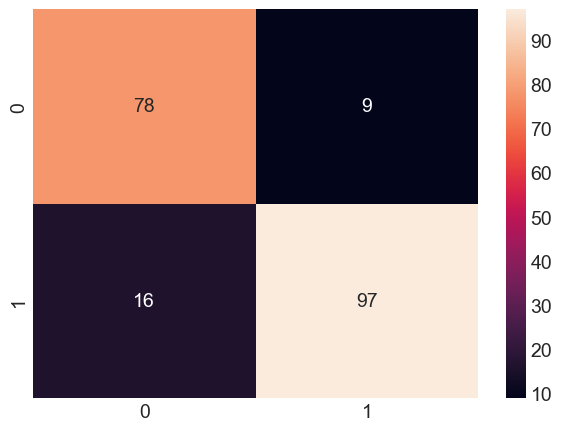

In [58]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.865 recall is : 0.8495575221238938 precision is : 0.9056603773584906 f1 is : 0.8767123287671232


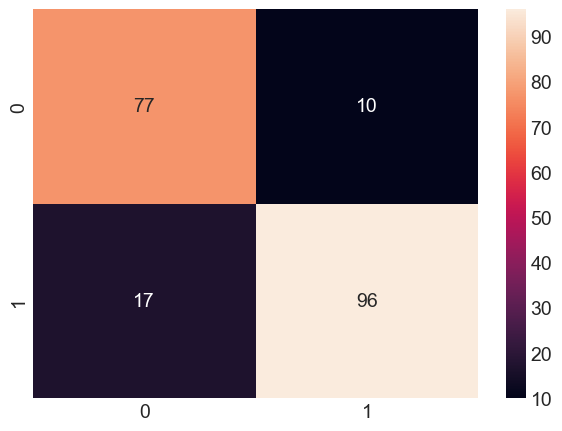

In [60]:
cal(model4)

KNeighborsClassifier()
accuracy is :  0.775 recall is : 0.7798165137614679 precision is : 0.8018867924528302 f1 is : 0.7906976744186046


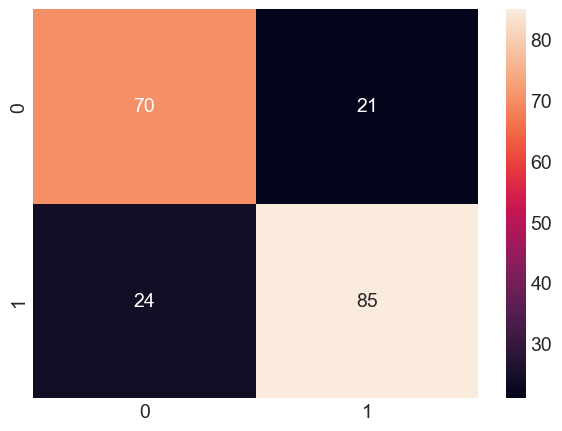

In [62]:
cal(model5)

GaussianNB()
accuracy is :  0.725 recall is : 0.7802197802197802 precision is : 0.6698113207547169 f1 is : 0.7208121827411168


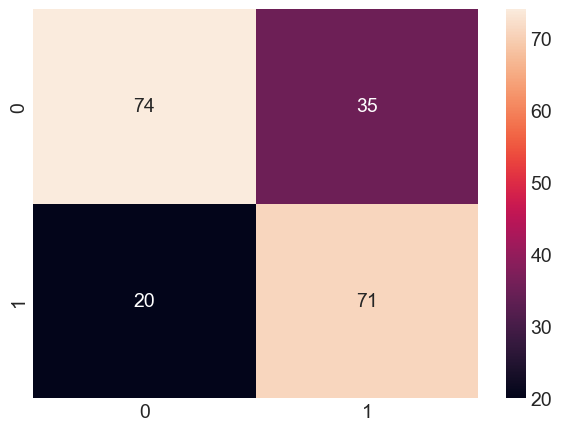

In [64]:
cal(model6)

DecisionTreeClassifier()
accuracy is :  0.82 recall is : 0.8017241379310345 precision is : 0.8773584905660378 f1 is : 0.8378378378378378


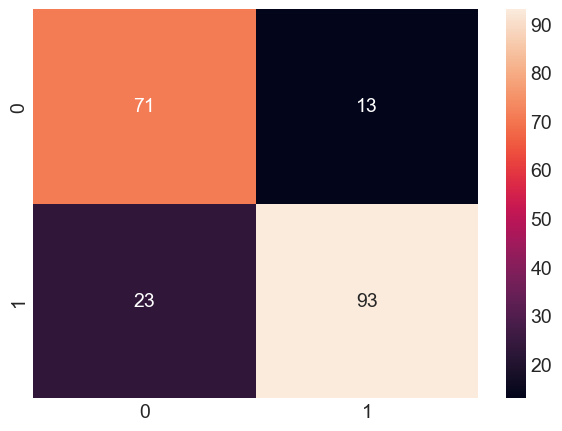

In [66]:
cal(model7)

In [68]:
final_result=pd.DataFrame({'Algorisms':col , 'Accuracies':result1,'Recal':result2,'precision':result3,'F1_Score':result4})


In [70]:
final_result

,Algorisms,Accuracies,Recal,precision,F1_Score
0,LogisticRegression,0.735,0.784946,0.688679,0.733668
1,SVC,0.715,0.742574,0.707547,0.724638
2,RandomForestClassifier,0.875,0.858407,0.915094,0.885845
3,GradientBoostingClassifier,0.865,0.849558,0.905660,0.876712
4,KNeighborsClassifier,0.775,0.779817,0.801887,0.790698
5,GaussianNB,0.725,0.780220,0.669811,0.720812
6,DecisionTreeClassifier,0.820,0.801724,0.877358,0.837838


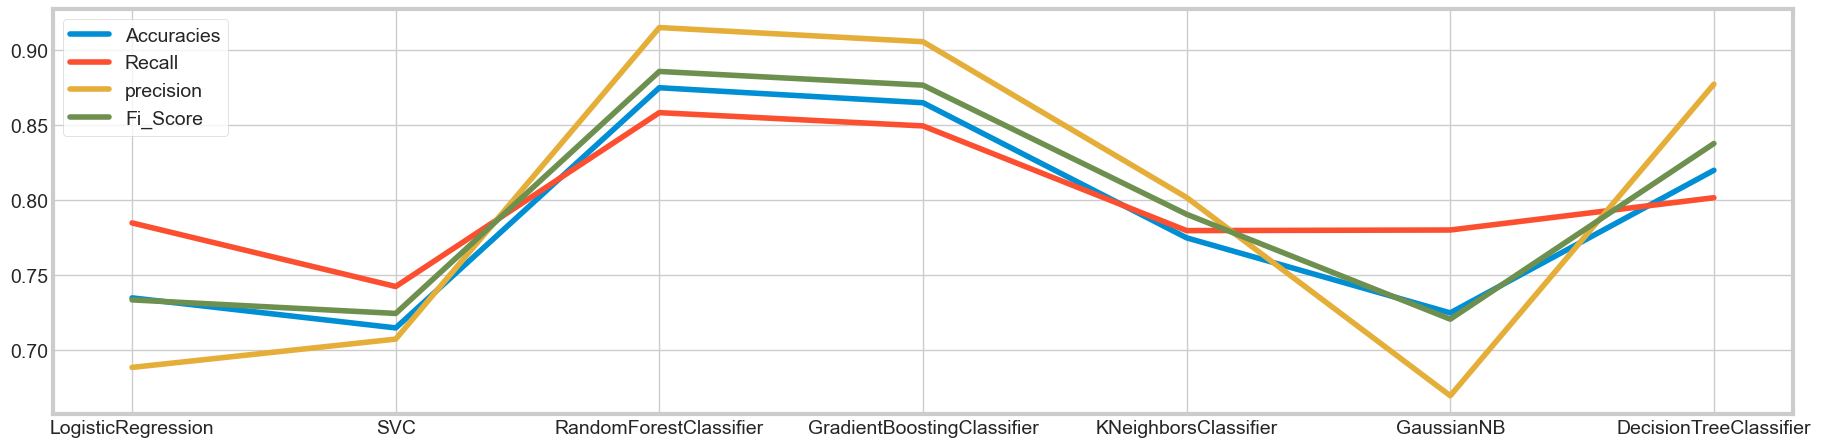

In [72]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorisms,result1, label='Accuracies')
plt.plot(final_result.Algorisms,result2 , label='Recall')
plt.plot(final_result.Algorisms,result3 , label='precision')
plt.plot(final_result.Algorisms,result4 , label='Fi_Score')
plt.legend()
plt.show()

In [74]:
"""param_grid = {
    'n_estimators': [100, 500, 1000,1500], 
    'max_depth': [None, 5,7, 10], 
    'min_samples_split': [2, 5,7, 10], 
    'min_samples_leaf': [1, 2,3, 4]
}"""

"param_grid = {\n    'n_estimators': [100, 500, 1000,1500], \n    'max_depth': [None, 5,7, 10], \n    'min_samples_split': [2, 5,7, 10], \n    'min_samples_leaf': [1, 2,3, 4]\n}"

In [76]:
"""model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(x_res,y_res)
print(grid_search.best_params_)"""

'model=RandomForestClassifier()\nfrom sklearn.model_selection import GridSearchCV\ngrid_search = GridSearchCV(model, param_grid=param_grid, cv=5)\ngrid_search.fit(x_res,y_res)\nprint(grid_search.best_params_)'


=== SHAP: RandomForestClassifier ===

Top features for RandomForest:
--------------------------------------------------


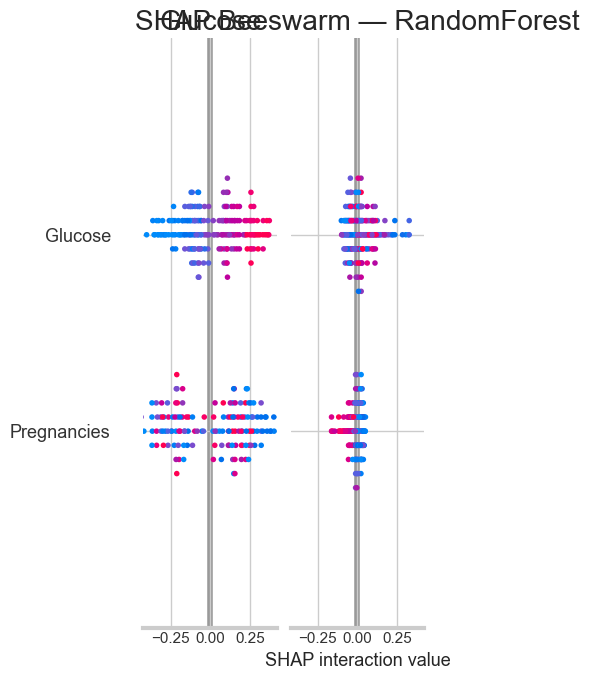

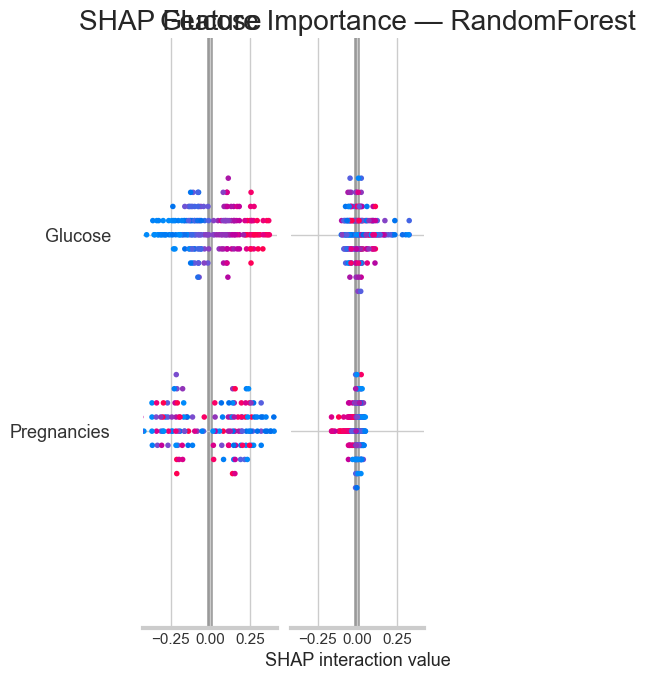




=== SHAP: GradientBoostingClassifier ===

Top features for GradientBoosting:
--------------------------------------------------


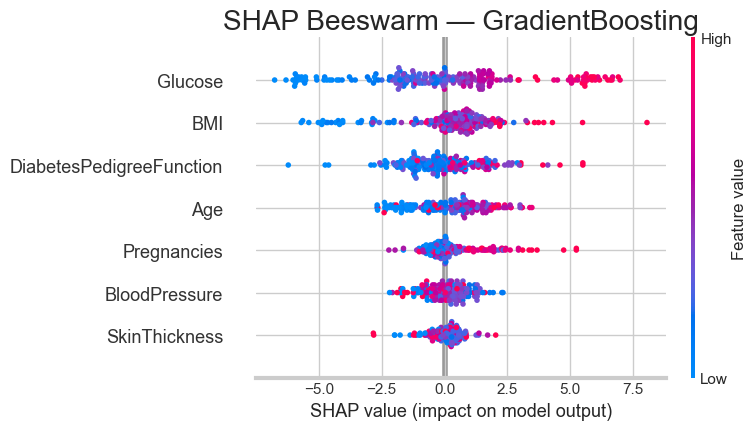

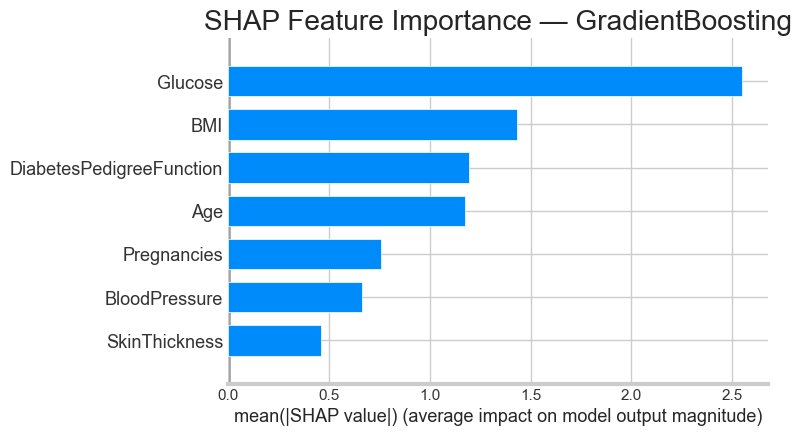




=== SHAP: DecisionTreeClassifier ===

Top features for DecisionTree:
--------------------------------------------------


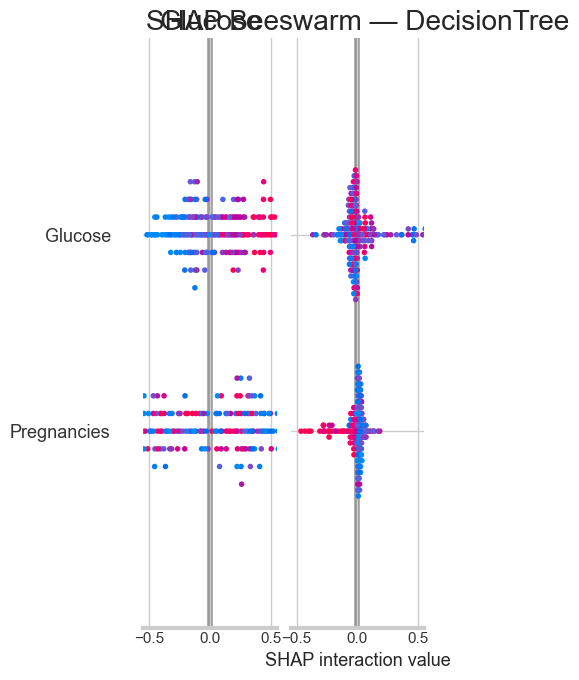

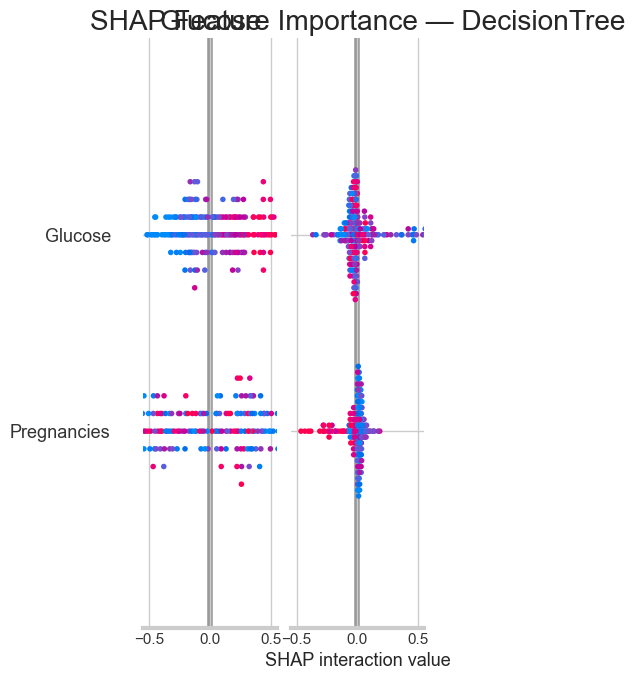




=== SHAP: LogisticRegression ===

Top features for LogisticRegression:
--------------------------------------------------


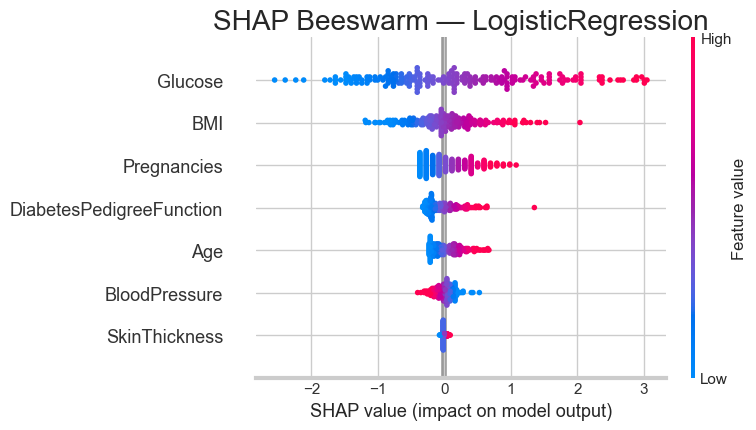

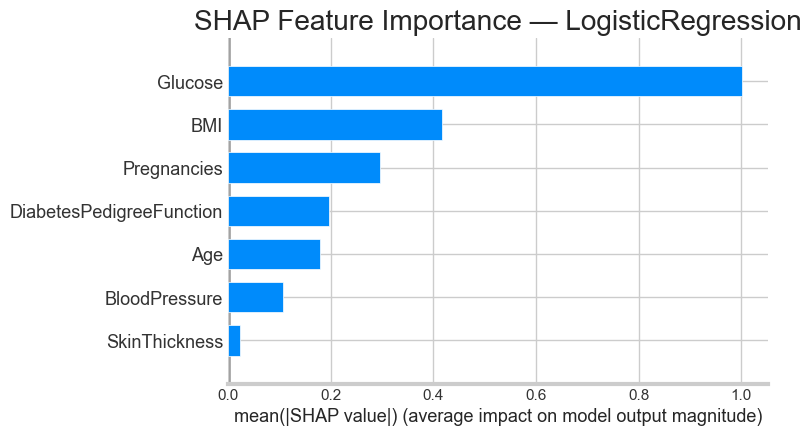




=== SHAP: SVC ===


  0%|          | 0/200 [00:00<?, ?it/s]


Top features for SVC:
--------------------------------------------------


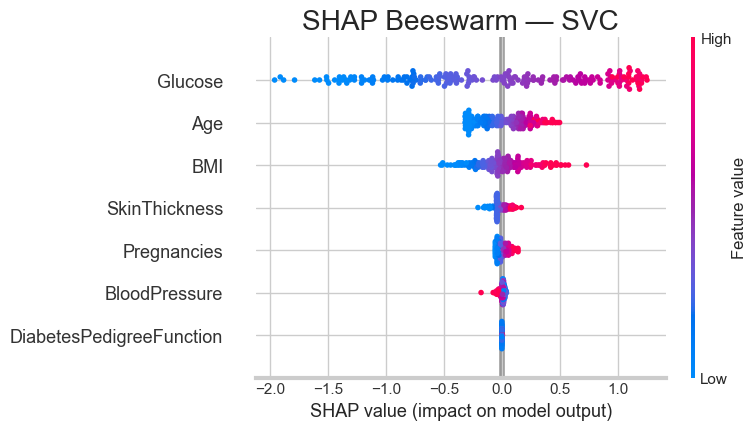

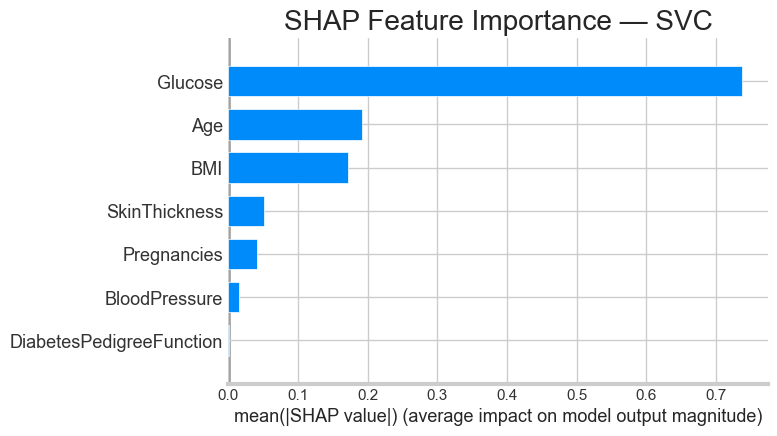




=== SHAP: KNeighborsClassifier ===


  0%|          | 0/200 [00:00<?, ?it/s]


Top features for KNN:
--------------------------------------------------


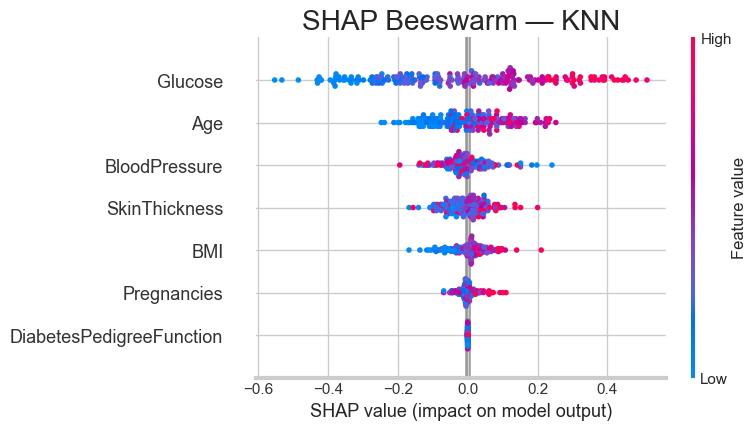

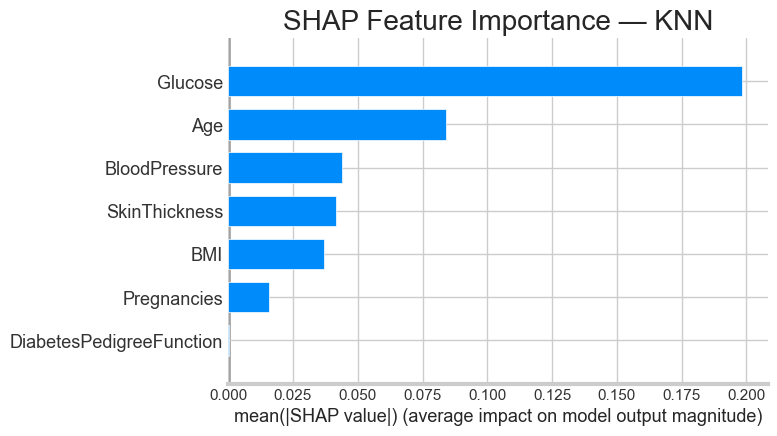




=== SHAP: GaussianNB ===


  0%|          | 0/200 [00:00<?, ?it/s]


Top features for GaussianNB:
--------------------------------------------------


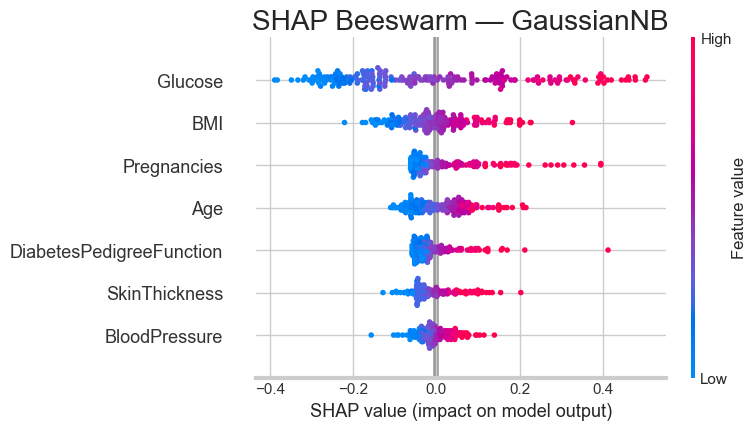

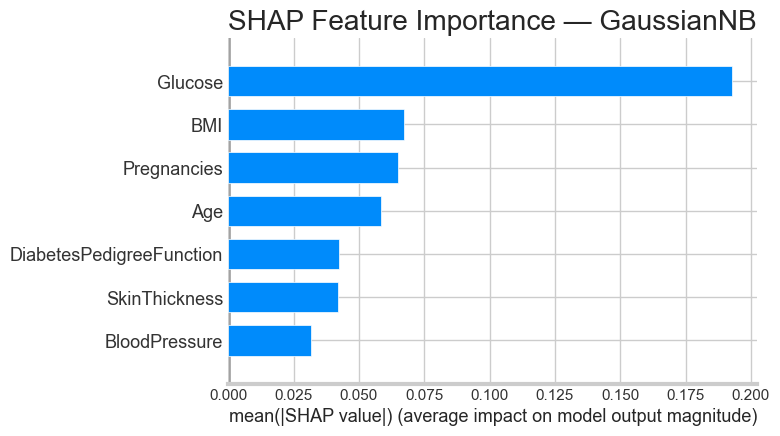

In [109]:
# =========================
# SHAP Explainability for Models (spaced output)
# =========================
# !pip install shap  # Uncomment if running in Colab or missing shap
import shap
shap.initjs()

# Small sample for speed
X_bg   = shap.sample(x_train, min(200, len(x_train)), random_state=41)
X_samp = shap.sample(x_test , min(300, len(x_test )), random_state=41)

def proba_or_decision(fitted_model):
    """Return a prediction function for SHAP."""
    if hasattr(fitted_model, "predict_proba"):
        return lambda X: fitted_model.predict_proba(X)[:, 1]
    if hasattr(fitted_model, "decision_function"):
        return lambda X: fitted_model.decision_function(X)
    return lambda X: fitted_model.predict(X)

def shap_bar_and_beeswarm(values, data_to_plot, feature_names=None, title_suffix=""):
    print(f"\nTop features for {title_suffix}:\n" + "-"*50)
    shap.summary_plot(values, data_to_plot, feature_names=feature_names, show=False)
    plt.title(f"SHAP Beeswarm — {title_suffix}")
    plt.show()
    shap.summary_plot(values, data_to_plot, feature_names=feature_names, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance — {title_suffix}")
    plt.show()
    print("\n" + "="*70 + "\n")  # Spacer line after each model

# RandomForest
print("\n=== SHAP: RandomForestClassifier ===")
rf_expl = shap.TreeExplainer(model3)
rf_vals = rf_expl.shap_values(X_samp)
rf_pos  = rf_vals[1] if isinstance(rf_vals, list) else rf_vals
shap_bar_and_beeswarm(rf_pos, X_samp, feature_names=X_samp.columns, title_suffix="RandomForest")

# GradientBoosting
print("\n=== SHAP: GradientBoostingClassifier ===")
gb_expl = shap.TreeExplainer(model4)
gb_vals = gb_expl.shap_values(X_samp)
shap_bar_and_beeswarm(gb_vals, X_samp, feature_names=X_samp.columns, title_suffix="GradientBoosting")

# DecisionTree
print("\n=== SHAP: DecisionTreeClassifier ===")
dt_expl = shap.TreeExplainer(model7)
dt_vals = dt_expl.shap_values(X_samp)
dt_pos  = dt_vals[1] if isinstance(dt_vals, list) else dt_vals
shap_bar_and_beeswarm(dt_pos, X_samp, feature_names=X_samp.columns, title_suffix="DecisionTree")

# LogisticRegression
print("\n=== SHAP: LogisticRegression ===")
lr_expl = shap.LinearExplainer(model1, X_bg)
lr_vals = lr_expl.shap_values(X_samp)
shap_bar_and_beeswarm(lr_vals, X_samp, feature_names=X_samp.columns, title_suffix="LogisticRegression")

# SVC -> KernelExplainer
print("\n=== SHAP: SVC ===")
svc_expl = shap.KernelExplainer(proba_or_decision(model2), shap.sample(x_train, 100, random_state=41))
svc_vals = svc_expl.shap_values(X_samp, nsamples=200)
shap_bar_and_beeswarm(svc_vals, X_samp, feature_names=X_samp.columns, title_suffix="SVC")

# KNN -> KernelExplainer
print("\n=== SHAP: KNeighborsClassifier ===")
knn_expl = shap.KernelExplainer(proba_or_decision(model5), shap.sample(x_train, 100, random_state=41))
knn_vals = knn_expl.shap_values(X_samp, nsamples=200)
shap_bar_and_beeswarm(knn_vals, X_samp, feature_names=X_samp.columns, title_suffix="KNN")

# GaussianNB -> KernelExplainer
print("\n=== SHAP: GaussianNB ===")
gnb_expl = shap.KernelExplainer(proba_or_decision(model6), shap.sample(x_train, 100, random_state=41))
gnb_vals = gnb_expl.shap_values(X_samp, nsamples=200)
shap_bar_and_beeswarm(gnb_vals, X_samp, feature_names=X_samp.columns, title_suffix="GaussianNB")
